# Basics and Package Structure

If you're just interested in pulling data, you will primarily be using `nba_api.stats.endpoints`.
This submodule contains a class for each API endpoint supported by stats.nba.com.
For example, [the PlayerCareerStats class](https://github.com/swar/nba_api/blob/master/nba_api/stats/endpoints/playercareerstats.py) is initialized with a player ID and returns some career statistics for the player.

In [405]:
import numpy as np
import pandas as pd
import seaborn as sns
from nba_api.stats.endpoints import playercareerstats
from nba_api.stats.endpoints import drafthistory
from nba_api.stats.endpoints import playerdashboardbyshootingsplits
from nba_api.stats.endpoints import teamyearbyyearstats
# Anthony Davis
career = playercareerstats.PlayerCareerStats(player_id='203076')
career.get_data_frames()[0]
ad = drafthistory.DraftHistory(overall_pick_nullable=[str(i) for i in range(32)])
# shooting = playerdashboardbyshootingsplits.PlayerDashboardByShootingSplits(player_id=)

pd.set_option('display.max_rows', 2000)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [274]:
nba_2019 = pd.read_csv('./advanced_csvs/2019.csv')
nba_2018 = pd.read_csv('./advanced_csvs/2018.csv')
nba_2017 = pd.read_csv('./advanced_csvs/2017.csv')
nba_2016 = pd.read_csv('./advanced_csvs/2016.csv')
nba_2015 = pd.read_csv('./advanced_csvs/2015.csv')
nba_2014 = pd.read_csv('./advanced_csvs/2014.csv')
nba_2013 = pd.read_csv('./advanced_csvs/2013.csv')
nba_2012 = pd.read_csv('./advanced_csvs/2012.csv')
nba_2011 = pd.read_csv('./advanced_csvs/2011.csv')
nba_2010 = pd.read_csv('./advanced_csvs/2010.csv')
nba_2009 = pd.read_csv('./advanced_csvs/2009.csv')
nba_2008 = pd.read_csv('./advanced_csvs/2008.csv')
nba_2007 = pd.read_csv('./advanced_csvs/2007.csv')
nba_2006 = pd.read_csv('./advanced_csvs/2006.csv')
nba_2019['SEASON'] = 2019
nba_2018['SEASON'] = 2018
nba_2017['SEASON'] = 2017
nba_2016['SEASON'] = 2016
nba_2015['SEASON'] = 2015
nba_2014['SEASON'] = 2014
nba_2013['SEASON'] = 2013
nba_2012['SEASON'] = 2012
nba_2011['SEASON'] = 2011
nba_2010['SEASON'] = 2010
nba_2009['SEASON'] = 2009
nba_2008['SEASON'] = 2008
nba_2007['SEASON'] = 2007
nba_2006['SEASON'] = 2006
df_list = [nba_2019, nba_2018, nba_2017, nba_2016, nba_2015, nba_2014, nba_2013, 
           nba_2012, nba_2011, nba_2010, nba_2009, nba_2008, nba_2007, nba_2006]

In [296]:
advanced = pd.concat([nba_2019, nba_2018, nba_2017, nba_2016, nba_2015, nba_2014, nba_2013, nba_2012, nba_2011, nba_2010, nba_2009, nba_2008, nba_2007, nba_2006])

In [297]:
advanced.drop(columns=['Unnamed: 19', 'Unnamed: 24', 'Rk'], inplace=True)
advanced.head()

,PLAYER_NAME,Pos,Age,Tm,G,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,SEASON
0,Álex Abrines,SG,25,OKC,31,588,6.3,0.507,0.809,0.083,0.9,7.8,4.2,4.3,1.3,0.9,7.9,12.2,0.1,0.6,0.6,0.053,-2.4,-0.9,-3.4,-0.2,2019
1,Quincy Acy,PF,28,PHO,10,123,2.9,0.379,0.833,0.556,2.7,20.1,11.3,8.2,0.4,2.7,15.2,9.2,-0.1,0.0,-0.1,-0.022,-5.7,-0.3,-5.9,-0.1,2019
2,Jaylen Adams,PG,22,ATL,34,428,7.6,0.474,0.673,0.082,2.6,12.3,7.4,19.8,1.5,1.0,19.7,13.5,-0.1,0.2,0.1,0.011,-3.1,-1.3,-4.4,-0.3,2019
3,Steven Adams,C,25,OKC,80,2669,18.5,0.591,0.002,0.361,14.7,14.8,14.7,6.6,2.0,2.4,12.6,16.4,5.1,4.0,9.1,0.163,0.6,2.1,2.7,3.2,2019
4,Bam Adebayo,C,21,MIA,82,1913,17.9,0.623,0.031,0.465,9.2,24.0,16.6,14.2,1.8,3.0,17.1,15.8,3.4,3.4,6.8,0.171,-0.6,3.6,3.0,2.4,2019


In [342]:
for player in players:
    if player in advanced['PLAYER_NAME']:
        print(player)

In [365]:
picks_df = pd.DataFrame()
for player in players:
    picks_df = picks_df.append(advanced.loc[(advanced['PLAYER_NAME'] == player)])


In [483]:
picks_df.groupby(by=["PLAYER_NAME","SEASON"]).sum()


Age    G    MP    PER    TS%   3PAr    FTr   ORB%   DRB%  TRB%   AST%  STL%  BLK%  TOV%   USG%   OWS  DWS    WS  WS/48  OBPM  DBPM   BPM  VORP
PLAYER_NAME              SEASON                                                                                                                                                
Aaron Brooks             2008     23   51   608   13.1  0.535  0.484  0.218    2.5    7.9   5.2   23.5   1.1   0.6  15.1   21.8   0.6  0.8   1.4  0.112   0.0  -1.8  -1.8   0.0
                         2009     24   80  1998   12.9  0.521  0.395  0.220    2.0    7.0   4.6   20.2   1.2   0.3  12.7   22.9   1.4  2.2   3.6  0.086   0.2  -1.5  -1.3   0.4
                         2010     25   82  2919   16.0  0.549  0.394  0.224    2.0    6.6   4.2   25.6   1.2   0.3  13.7   25.7   3.9  1.6   5.5  0.091   2.7  -2.5   0.2   1.6
                         2011     78  118  2568   40.4  1.487  1.174  0.738    5.5   15.2  10.4   89.4   4.0   0.6  41.1   77.7   1.4  0.8   2.2  0.133   1.7 -12.0 -10.3  -1.0
                         2013     84  106  1994   29.5  1.502  1.381  0.337    5.9   19.0  12.3   58.9   4.3   7.4  56.2   55.7   1.6  0.0   1.7  0.023  -5.6  -5.9 -11.5  -0.3
                         2014     87  144  3114   37.3  1.555  1.294  0.491    9.5   19.9  14.7   69.1   4.9   1.8  47.3   61.4   2.5  1.8   4.3  0.201   1.1  -5.6  -4.6   0.4
                         2015     30   82  1885   14.4  0.534  0.383  0.213    1.9    7.5   4.8   24.2   1.5   0.6  14.9   25.0   1.7  1.5   3.3  0.083   1.0  -2.4  -1.4   0.3
                         2016     31   69  1108   11.8  0.494  0.394  0.136    2.0    7.5   4.8   26.0   1.4   0.7  14.2   22.9   0.2  0.7   0.9  0.040  -0.5  -2.8  -3.3  -0.4
                         2017     32   65   894    9.5  0.507  0.427  0.133    2.3    6.3   4.3   20.7   1.4   0.9  17.2   19.2  -0.2  0.5   0.3  0.016  -2.1  -2.5  -4.6  -0.6
                         2018     33   32   189    9.8  0.508  0.449  0.159    4.2    6.2   5.2   15.1   1.6   0.0  13.0   19.9   0.1  0.1   0.1  0.033  -0.8  -3.6  -4.3  -0.1
Aaron Gordon             2015     19   47   797   11.4  0.517  0.231  0.293    6.4   17.8  12.0    6.3   1.3   2.2  13.9   15.5   0.3  0.7   1.0  0.060  -2.8   0.0  -2.8  -0.2
                         2016     20   78  1863   17.0  0.541  0.245  0.333    9.0   21.3  15.1   10.3   1.6   2.4   9.0   17.3   3.2  2.2   5.4  0.139   0.6   1.2   1.8   1.8
                         2017     21   80  2298   14.5  0.530  0.309  0.251    5.3   14.1   9.6   10.5   1.4   1.4   8.5   20.1   2.0  1.7   3.7  0.077  -0.2  -0.4  -0.7   0.8
                         2018     22   58  1909   16.5  0.530  0.395  0.260    5.0   21.5  13.2   11.7   1.5   1.9  10.0   24.7   0.9  2.0   2.9  0.072   0.0   0.0   0.0   1.0
                         2019     23   78  2633   15.1  0.538  0.332  0.242    5.2   18.4  11.7   16.6   1.1   1.8  12.3   21.8   1.8  3.3   5.1  0.093  -0.2   1.2   1.0   2.0
Aaron Holiday            2019     22   50   646   11.9  0.518  0.485  0.191    0.9   10.4   5.8   19.3   1.6   1.8  12.3   21.9   0.1  0.8   0.9  0.065  -1.5  -1.1  -2.6  -0.1
Acie Law                 2008     23   56   865    7.7  0.455  0.143  0.203    1.6    6.0   3.8   20.4   1.8   0.0  17.8   16.5  -0.5  0.4  -0.1 -0.007  -4.1  -2.6  -6.7  -1.0
                         2009     24   55   560   10.6  0.490  0.209  0.432    1.3   10.9   6.1   23.4   1.1   0.4  14.9   16.3   0.3  0.4   0.7  0.062  -3.0  -2.0  -5.0  -0.4
                         2010    100   52   468   60.2  2.336  0.757  2.762    3.9   22.5  13.4   67.7   9.7   2.9  54.8   90.4   0.7  0.3   1.2  0.386  -6.9 -10.4 -17.3  -0.2
                         2011     78  102  1452   21.6  1.290  0.690  1.193    7.3   26.4  16.7   51.5   6.6   0.0  61.3   47.3   0.2  0.6   0.8 -0.059 -13.2  -4.3 -17.4  -1.0
Adam Morrison            2007     22   78  2326    7.9  0.450  0.273  0.179    2.7    9.2   5.9   11.9   0.6   0.2  11.3   22.4  -2.2  0.8  -1.5 -0.030  -3.0  -2

In [413]:
picks_df.loc[
    (picks_df['MP'] >= 1500) & 
    (picks_df['TS%'] >= 0.575) &
    (picks_df['VORP'] >= 2)].sort_values(by=['PER', 'SEASON'], ascending=False)


,PLAYER_NAME,Pos,Age,Tm,G,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,SEASON
116,Stephen Curry,PG,27,GSW,79,2700,31.5,0.669,0.554,0.250,2.9,13.6,8.6,33.7,3.0,0.4,12.9,32.6,13.8,4.1,17.9,0.318,12.4,0.1,12.5,9.8,2016
19,Giannis Antetokounmpo,PF,24,MIL,72,2358,30.9,0.644,0.163,0.550,7.3,30.0,19.3,30.3,1.8,3.9,14.8,32.3,8.9,5.5,14.4,0.292,5.7,5.0,10.8,7.6,2019
147,Anthony Davis,PF,21,NOP,68,2455,30.8,0.591,0.010,0.384,8.0,24.1,16.1,11.6,2.1,6.2,6.3,27.8,9.9,4.2,14.0,0.274,4.2,3.0,7.1,5.7,2015
267,James Harden,PG,29,HOU,78,2867,30.6,0.616,0.539,0.449,2.5,17.8,10.0,39.5,2.7,1.7,14.5,40.5,11.4,3.8,15.2,0.254,10.5,1.1,11.7,9.9,2019
161,Anthony Davis,C,25,NOP,56,1850,30.3,0.597,0.141,0.422,9.9,27.5,18.8,19.0,2.2,6.0,8.4,29.5,6.4,3.1,9.5,0.247,4.7,3.9,8.5,4.9,2019
232,James Harden,SG,28,HOU,72,2551,29.8,0.619,0.498,0.502,1.8,15.2,8.6,45.1,2.4,1.7,15.1,36.1,11.6,3.8,15.4,0.289,9.6,1.3,10.9,8.3,2018
185,Kevin Durant,SF,25,OKC,81,3122,29.8,0.635,0.291,0.477,2.2,18.6,10.8,26.7,1.7,1.5,12.2,33.0,14.8,4.4,19.2,0.295,8.4,0.4,8.8,8.5,2014
148,Anthony Davis,PF,24,NOP,75,2727,28.9,0.612,0.111,0.409,7.7,24.8,16.5,10.8,2.0,5.6,8.6,30.0,8.8,4.9,13.7,0.241,2.8,2.3,5.2,4.9,2018
148,Kevin Durant,SF,24,OKC,81,3119,28.3,0.647,0.233,0.523,1.8,20.3,11.8,21.7,1.9,2.6,13.7,29.8,13.6,5.3,18.9,0.291,6.2,1.4,7.7,7.6,2013
146,Stephen Curry,PG,29,GSW,51,1631,28.2,0.675,0.580,0.350,2.7,14.4,9.0,30.3,2.4,0.4,13.3,31.0,7.2,1.9,9.1,0.267,9.9,-1.3,8.6,4.4,2018


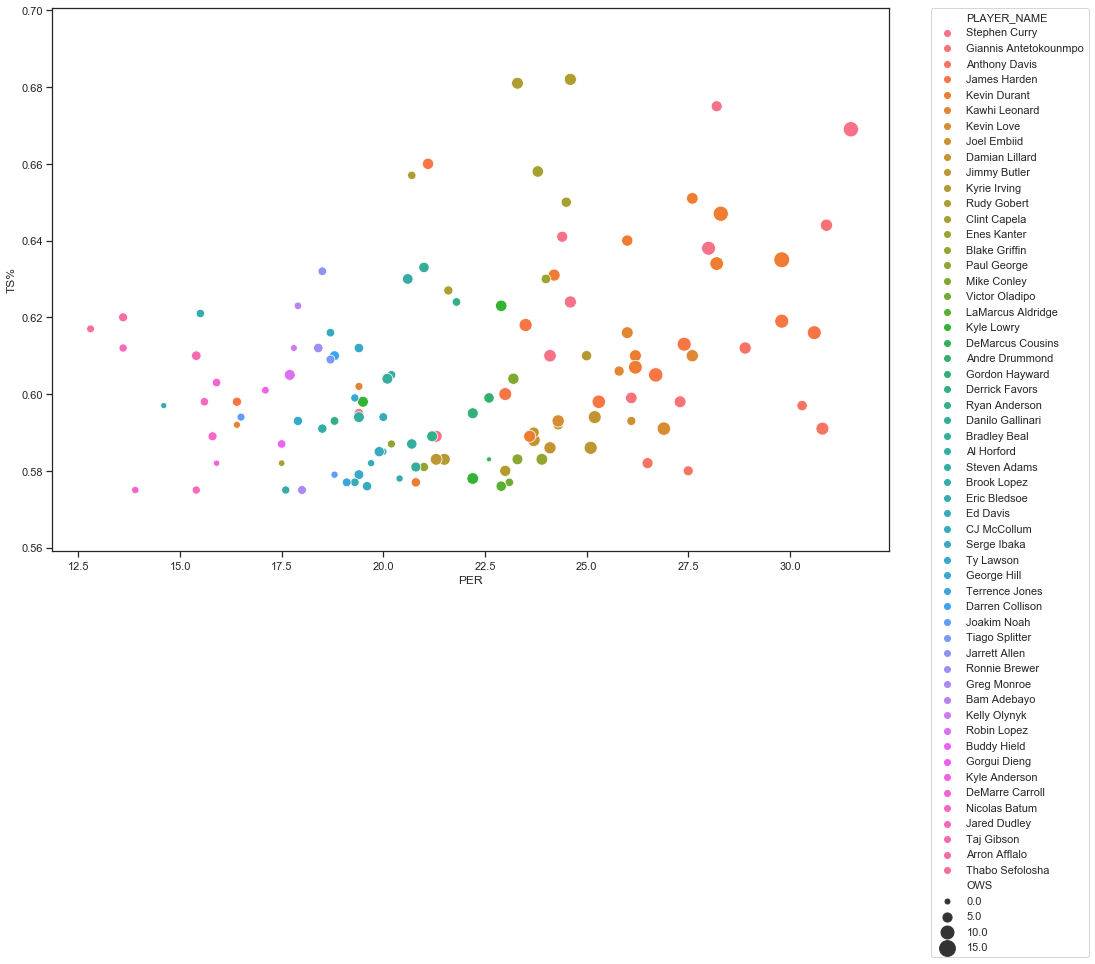

In [482]:
from matplotlib import pyplot as plt
sns.set_style("ticks")
plt.figure(figsize=(15,10))
sns.scatterplot(x='PER', y='TS%', data=hey, hue='PLAYER_NAME', size='OWS', legend='brief', sizes=(25, 250))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);

In [380]:
print(len(picks_df['PLAYER_NAME'].unique()))
print(len(players))

304
420


In [ ]:
players = drafted_players['PLAYER_NAME'].unique()

In [387]:
players

array(['Zion Williamson', 'Ja Morant', 'RJ Barrett', "De'Andre Hunter",
       'Darius Garland', 'Jarrett Culver', 'Coby White', 'Jaxson Hayes',
       'Rui Hachimura', 'Cameron Reddish', 'Cameron Johnson',
       'P.J. Washington', 'Tyler Herro', 'Romeo Langford',
       'Sekou Doumbouya', 'Chuma Okeke', 'Nickeil Alexander-Walker',
       'Goga Bitadze', 'Luka Samanic', 'Matisse Thybulle',
       'Brandon Clarke', 'Grant Williams', 'Darius Bazley', 'Ty Jerome',
       'Nassir Little', 'Dylan Windler', 'Mfiondu Kabengele',
       'Jordan Poole', 'Keldon Johnson', 'Kevin Porter Jr.',
       'Deandre Ayton', 'Marvin Bagley III', 'Luka Doncic',
       'Jaren Jackson Jr.', 'Trae Young', 'Mo Bamba',
       'Wendell Carter Jr.', 'Collin Sexton', 'Kevin Knox',
       'Mikal Bridges', 'Shai Gilgeous-Alexander', 'Miles Bridges',
       'Jerome Robinson', 'Michael Porter Jr.', 'Troy Brown Jr.',
       'Zhaire Smith', 'Donte DiVincenzo', 'Lonnie Walker IV',
       'Kevin Huerter', 'Josh Okogie', 

In [276]:
for df in df_list:
    df.rename({'Player': 'PLAYER_NAME'}, axis=1, inplace=True)
    

In [134]:
def divide_number(x, y):
    blank = []
    for i in range(len(x)):        
        if (y[i] == 0) or (y[i] is np.nan) or (x[i] is np.nan):
            blank.append(0)
        else:
            result = x[i] / y[i]
            blank.append(result)
    return blank

In [6]:
draft = ad.get_data_frames()[0]

In [8]:
draft['SEASON'] = draft['SEASON'].astype(int) # convert all columns of DataFrame
draft.dtypes

PERSON_ID             int64
PLAYER_NAME          object
SEASON                int64
ROUND_NUMBER          int64
ROUND_PICK            int64
OVERALL_PICK          int64
DRAFT_TYPE           object
TEAM_ID               int64
TEAM_CITY            object
TEAM_NAME            object
TEAM_ABBREVIATION    object
ORGANIZATION         object
ORGANIZATION_TYPE    object
dtype: object

In [9]:
draft_2006_2019 = draft.loc[(draft['SEASON'] > 2005) & (draft['ROUND_NUMBER'] == 1)]

In [10]:
draft_2006_2019

,PERSON_ID,PLAYER_NAME,SEASON,ROUND_NUMBER,ROUND_PICK,OVERALL_PICK,DRAFT_TYPE,TEAM_ID,TEAM_CITY,TEAM_NAME,TEAM_ABBREVIATION,ORGANIZATION,ORGANIZATION_TYPE
0,1629627,Zion Williamson,2019,1,1,1,Draft,1610612740,New Orleans,Pelicans,NOP,Duke,College/University
1,1629630,Ja Morant,2019,1,2,2,Draft,1610612763,Memphis,Grizzlies,MEM,Murray State,College/University
2,1629628,RJ Barrett,2019,1,3,3,Draft,1610612752,New York,Knicks,NYK,Duke,College/University
3,1629631,De'Andre Hunter,2019,1,4,4,Draft,1610612747,Los Angeles,Lakers,LAL,Virginia,College/University
4,1629636,Darius Garland,2019,1,5,5,Draft,1610612739,Cleveland,Cavaliers,CLE,Vanderbilt,College/University
5,1629633,Jarrett Culver,2019,1,6,6,Draft,1610612756,Phoenix,Suns,PHX,Texas Tech,College/University
6,1629632,Coby White,2019,1,7,7,Draft,1610612741,Chicago,Bulls,CHI,North Carolina,College/University
7,1629637,Jaxson Hayes,2019,1,8,8,Draft,1610612737,Atlanta,Hawks,ATL,Texas,College/University
8,1629060,Rui Hachimura,2019,1,9,9,Draft,1610612764,Washington,Wizards,WAS,Gonzaga,College/University
9,1629629,Cameron Reddish,2019,1,10,10,Draft,1610612737,Atlanta,Hawks,ATL,Duke,College/University


In [11]:
players = draft_2006_2019['PERSON_ID']

In [13]:
id_list = [] 
for id_number in players:
    id_list.append(id_number)
    print(id_number)


1629627
1629630
1629628
1629631
1629636
1629633
1629632
1629637
1629060
1629629
1629661
1629023
1629639
1629641
1629635
1629643
1629638
1629048
1629677
1629680
1629634
1629684
1629647
1629660
1629642
1629685
1629662
1629673
1629640
1629645
1629028
1628963
1629029
1628991
1629027
1628964
1628976
1629012
1628995
1628969
1628983
1628970
1629010
1629008
1628972
1629015
1628978
1629022
1628989
1629006
1628960
1628990
1628988
1629014
1629021
1629013
1629057
1628980
1629058
1629016
1628365
1628366
1628369
1628367
1628368
1628371
1628374
1628373
1628372
1628380
1628370
1628379
1628378
1628389
1628382
1628383
1628391
1628388
1628381
1628385
1628390
1628386
1628384
1628399
1628394
1628403
1628398
1628396
1628401
1628404
1627732
1627742
1627759
1627733
1627739
1627741
1627750
1627737
1627751
1627748
1627734
1627752
1627834
1627756
1627823
1627824
1627735
1627740
1627736
1627747
1627761
1627781
1627790
1627789
1627744
1627788
1627783
1627746
1627749
1627745
1626157
1626156
1626143
204001
1626209
1

In [15]:
frame = pd.DataFrame()
for i in id_list:
    test = playercareerstats.PlayerCareerStats(player_id=str(i))
    frame = frame.append(test.get_data_frames()[0])
frame

,PLAYER_ID,SEASON_ID,LEAGUE_ID,TEAM_ID,TEAM_ABBREVIATION,PLAYER_AGE,GP,GS,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS
0,1629028,2018-19,00,1610612756,PHX,20.0,71,70,2183.0,509,870,0.585,0,4,0.000,141,189,0.746,223,506,729,125,61,67,126,209,1159
0,1628963,2018-19,00,1610612758,SAC,20.0,62,4,1568.0,356,706,0.504,30,96,0.313,181,262,0.691,162,309,471,62,33,59,98,120,923
0,1629029,2018-19,00,1610612742,DAL,20.0,72,72,2318.0,506,1186,0.427,168,514,0.327,346,485,0.713,86,477,563,429,77,25,247,137,1526
0,1628991,2018-19,00,1610612763,MEM,19.0,58,56,1515.0,298,589,0.506,51,142,0.359,151,197,0.766,73,199,272,64,52,82,98,220,798
0,1629027,2018-19,00,1610612737,ATL,20.0,81,81,2503.0,525,1256,0.418,156,482,0.324,343,414,0.829,64,237,301,653,72,15,308,140,1549
0,1628964,2018-19,00,1610612753,ORL,21.0,47,1,766.0,117,243,0.481,21,70,0.300,37,63,0.587,64,169,233,39,13,64,43,102,292
0,1628976,2018-19,00,1610612741,CHI,20.0,44,44,1110.0,180,371,0.485,6,32,0.188,89,112,0.795,87,220,307,78,26,58,65,152,455
0,1629012,2018-19,00,1610612739,CLE,20.0,82,72,2605.0,519,1206,0.430,119,296,0.402,214,255,0.839,57,179,236,243,44,6,185,186,1371
0,1628995,2018-19,00,1610612752,NYK,19.0,75,57,2158.0,338,914,0.370,125,364,0.343,162,226,0.717,61,274,335,82,43,24,114,175,963
0,1628969,2018-19,00,1610612756,PHX,22.0,82,56,2417.0,242,563,0.430,105,313,0.335,95,118,0.805,56,208,264,173,129,38,70,201,684


In [93]:
drafted_players = pd.merge(draft_2006_2019, frame, how='outer', right_on='PLAYER_ID', left_on='PERSON_ID')
two_TSA =  (2 * (drafted_players['FGA'] + (0.44 * drafted_players['FTA'])))
drafted_players['TS%'] = divide_number(drafted_players['PTS'], two_TSA)

In [145]:
drafted_players.columns

Index(['PERSON_ID', 'PLAYER_NAME', 'SEASON', 'ROUND_NUMBER', 'ROUND_PICK', 'OVERALL_PICK', 'DRAFT_TYPE', 'TEAM_ID_x', 'TEAM_CITY', 'TEAM_NAME', 'TEAM_ABBREVIATION_x', 'ORGANIZATION', 'ORGANIZATION_TYPE', 'PLAYER_ID', 'SEASON_ID', 'LEAGUE_ID', 'TEAM_ID_y', 'TEAM_ABBREVIATION_y', 'PLAYER_AGE', 'GP', 'GS', 'MIN', 'FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'eFG%'], dtype='object')

TS% - True Shooting Percentage; the formula is PTS / (2 * TSA). True shooting percentage is a measure of shooting efficiency that takes into account field goals, 3-point field goals, and free throws.

TSA - True Shooting Attempts; the formula is FGA + 0.44 * FTA.

Usg% - Usage Percentage (available since the 1977-78 season in the NBA); the formula is 100 * ((FGA + 0.44 * FTA + TOV) * (Tm MP / 5)) / (MP * (Tm FGA + 0.44 * Tm FTA + Tm TOV)). Usage percentage is an estimate of the percentage of team plays used by a player while he was on the floor.

VORP - Value Over Replacement Player (available since the 1973-74 season in the NBA); a box score estimate of the points per 100 TEAM possessions that a player contributed above a replacement-level (-2.0) player, translated to an average team and prorated to an 82-game season. Multiply by 2.70 to convert to wins over replacement. Please see the article About Box Plus/Minus (BPM) for more information.

In [165]:
drafted_players

,PERSON_ID,PLAYER_NAME,SEASON,ROUND_NUMBER,ROUND_PICK,OVERALL_PICK,DRAFT_TYPE,TEAM_ID_x,TEAM_CITY,TEAM_NAME,TEAM_ABBREVIATION_x,ORGANIZATION,ORGANIZATION_TYPE,PLAYER_ID,SEASON_ID,LEAGUE_ID,TEAM_ID_y,TEAM_ABBREVIATION_y,PLAYER_AGE,GP,GS,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS,eFG%,TS%
0,1629627,Zion Williamson,2019,1,1,1,Draft,1610612740,New Orleans,Pelicans,NOP,Duke,College/University,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000
1,1629630,Ja Morant,2019,1,2,2,Draft,1610612763,Memphis,Grizzlies,MEM,Murray State,College/University,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000
2,1629628,RJ Barrett,2019,1,3,3,Draft,1610612752,New York,Knicks,NYK,Duke,College/University,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000
3,1629631,De'Andre Hunter,2019,1,4,4,Draft,1610612747,Los Angeles,Lakers,LAL,Virginia,College/University,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000
4,1629636,Darius Garland,2019,1,5,5,Draft,1610612739,Cleveland,Cavaliers,CLE,Vanderbilt,College/University,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000
5,1629633,Jarrett Culver,2019,1,6,6,Draft,1610612756,Phoenix,Suns,PHX,Texas Tech,College/University,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000
6,1629632,Coby White,2019,1,7,7,Draft,1610612741,Chicago,Bulls,CHI,North Carolina,College/University,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000
7,1629637,Jaxson Hayes,2019,1,8,8,Draft,1610612737,Atlanta,Hawks,ATL,Texas,College/University,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000
8,1629060,Rui Hachimura,2019,1,9,9,Draft,1610612764,Washington,Wizards,WAS,Gonzaga,College/University,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000
9,1629629,Cameron Reddish,2019,1,10,10,Draft,1610612737,Atlanta,Hawks,ATL,Duke,College/University,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000


In [135]:
shooting = pd.DataFrame()
for i in id_list:
    test = playerdashboardbyshootingsplits.PlayerDashboardByShootingSplits(player_id=str(i))
    shooting = shooting.append(test.get_data_frames()[0])
shooting

,GROUP_SET,GROUP_VALUE,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,EFG_PCT,BLKA,PCT_AST_2PM,PCT_UAST_2PM,PCT_AST_3PM,PCT_UAST_3PM,PCT_AST_FGM,PCT_UAST_FGM,FGM_RANK,FGA_RANK,FG_PCT_RANK,FG3M_RANK,FG3A_RANK,FG3_PCT_RANK,EFG_PCT_RANK,BLKA_RANK,PCT_AST_2PM_RANK,PCT_UAST_2PM_RANK,PCT_AST_3PM_RANK,PCT_UAST_3PM_RANK,PCT_AST_FGM_RANK,PCT_UAST_FGM_RANK,CFID,CFPARAMS
0,Overall,2018-19,509,870,0.585,0,4,0.000,0.585,43,0.711,0.289,0.000,0.000,0.711,0.289,1,1,1,1,1,1,1,1,1,1,1,1,1,1,44,2018-19
0,Overall,2018-19,356,706,0.504,30,96,0.313,0.525,46,0.515,0.485,0.900,0.100,0.548,0.452,1,1,1,1,1,1,1,1,1,1,1,1,1,1,44,2018-19
0,Overall,2018-19,506,1186,0.427,168,514,0.327,0.497,52,0.195,0.805,0.423,0.577,0.271,0.729,1,1,1,1,1,1,1,1,1,1,1,1,1,1,44,2018-19
0,Overall,2018-19,298,589,0.506,51,142,0.359,0.549,41,0.636,0.364,0.941,0.059,0.688,0.312,1,1,1,1,1,1,1,1,1,1,1,1,1,1,44,2018-19
0,Overall,2018-19,525,1256,0.418,156,482,0.324,0.480,98,0.211,0.789,0.423,0.577,0.274,0.726,1,1,1,1,1,1,1,1,1,1,1,1,1,1,44,2018-19
0,Overall,2018-19,117,243,0.481,21,70,0.300,0.525,15,0.656,0.344,0.952,0.048,0.709,0.291,1,1,1,1,1,1,1,1,1,1,1,1,1,1,44,2018-19
0,Overall,2018-19,180,371,0.485,6,32,0.188,0.493,28,0.776,0.224,1.000,0.000,0.783,0.217,1,1,1,1,1,1,1,1,1,1,1,1,1,1,44,2018-19
0,Overall,2018-19,519,1206,0.430,119,296,0.402,0.480,101,0.318,0.683,0.639,0.361,0.391,0.609,1,1,1,1,1,1,1,1,1,1,1,1,1,1,44,2018-19
0,Overall,2018-19,338,914,0.370,125,364,0.343,0.438,60,0.479,0.521,0.896,0.104,0.633,0.367,1,1,1,1,1,1,1,1,1,1,1,1,1,1,44,2018-19
0,Overall,2018-19,242,563,0.430,105,313,0.335,0.523,32,0.715,0.285,0.962,0.038,0.822,0.178,1,1,1,1,1,1,1,1,1,1,1,1,1,1,44,2018-19


In [140]:
playercareerstats.PlayerCareerStats(player_id='1627742')

In [ ]:
drafted_players.to_csv('drafted_players.csv', index=False)

`career`, above, is a `PlayerCareerStats` object.
This class (and the other endpoint classes) supports several methods of accessing the data: `get_dict()`, `get_json()`, `get_data_frames()`, and more.
`get_data_frames()` returns a list of pandas DataFrames, and when working in notebooks, this is often your best option for viewing data.
In general, the first DataFrame in this list is the primary returned data structure and the one you'll want to look at.

Almost all of the endpoint classes take at least one required argument, along with several optional ones.
In the case of `PlayerCareerStats`, a player ID is required, but the user may also specify a league ID.

At the time of writing this notebook, these are the endpoints available:

<table><tr></tr><tr><td>boxscoreadvancedv2</td><td>boxscorefourfactorsv2</td><td>boxscoremiscv2</td><td>boxscoreplayertrackv2</td></tr><tr><td>boxscorescoringv2</td><td>boxscoresummaryv2</td><td>boxscoretraditionalv2</td><td>boxscoreusagev2</td></tr><tr><td>commonallplayers</td><td>commonplayerinfo</td><td>commonplayoffseries</td><td>commonteamroster</td></tr><tr><td>commonteamyears</td><td>defensehub</td><td>draftcombinedrillresults</td><td>draftcombinenonstationaryshooting</td></tr><tr><td>draftcombineplayeranthro</td><td>draftcombinespotshooting</td><td>draftcombinestats</td><td>drafthistory</td></tr><tr><td>franchisehistory</td><td>homepageleaders</td><td>homepagev2</td><td>infographicfanduelplayer</td></tr><tr><td>leaderstiles</td><td>leaguedashlineups</td><td>leaguedashplayerbiostats</td><td>leaguedashplayerclutch</td></tr><tr><td>leaguedashplayerptshot</td><td>leaguedashplayershotlocations</td><td>leaguedashplayerstats</td><td>leaguedashptdefend</td></tr><tr><td>leaguedashptstats</td><td>leaguedashptteamdefend</td><td>leaguedashteamclutch</td><td>leaguedashteamptshot</td></tr><tr><td>leaguedashteamshotlocations</td><td>leaguedashteamstats</td><td>leaguegamefinder</td><td>leaguegamelog</td></tr><tr><td>leagueleaders</td><td>leaguestandings</td><td>playbyplay</td><td>playbyplayv2</td></tr><tr><td>playerawards</td><td>playercareerstats</td><td>playercompare</td><td>playerdashboardbyclutch</td></tr><tr><td>playerdashboardbygamesplits</td><td>playerdashboardbygeneralsplits</td><td>playerdashboardbylastngames</td><td>playerdashboardbyopponent</td></tr><tr><td>playerdashboardbyshootingsplits</td><td>playerdashboardbyteamperformance</td><td>playerdashboardbyyearoveryear</td><td>playerdashptpass</td></tr><tr><td>playerdashptreb</td><td>playerdashptshotdefend</td><td>playerdashptshots</td><td>playerfantasyprofile</td></tr><tr><td>playerfantasyprofilebargraph</td><td>playergamelog</td><td>playergamestreakfinder</td><td>playernextngames</td></tr><tr><td>playerprofilev2</td><td>playersvsplayers</td><td>playervsplayer</td><td>playoffpicture</td></tr><tr><td>scoreboard</td><td>scoreboardv2</td><td>shotchartdetail</td><td>shotchartlineupdetail</td></tr><tr><td>teamdashboardbyclutch</td><td>teamdashboardbygamesplits</td><td>teamdashboardbygeneralsplits</td><td>teamdashboardbylastngames</td></tr><tr><td>teamdashboardbyopponent</td><td>teamdashboardbyshootingsplits</td><td>teamdashboardbyteamperformance</td><td>teamdashboardbyyearoveryear</td></tr><tr><td>teamdashlineups</td><td>teamdashptpass</td><td>teamdashptreb</td><td>teamdashptshots</td></tr><tr><td>teamdetails</td><td>teamgamelog</td><td>teamgamestreakfinder</td><td>teamhistoricalleaders</td></tr><tr><td>teaminfocommon</td><td>teamplayerdashboard</td><td>teamplayeronoffdetails</td><td>teamplayeronoffsummary</td></tr><tr><td>teamvsplayer</td><td>teamyearbyyearstats</td><td>videodetails</td><td>videoevents</td></tr><tr><td>videostatus</td></tr></table>

### Getting Team and Player IDs
The package also includes utilities for fetching player and team information available under `nba_api.stats.static`.
You can use this to fetch player IDs and team IDs, which are often used as inputs to API endpoints.

In [141]:
from nba_api.stats.static import teams
# get_teams returns a list of 30 dictionaries, each an NBA team.
nba_teams = teams.get_teams()
print('Number of teams fetched: {}'.format(len(nba_teams)))
nba_teams[:3]

Number of teams fetched: 30


[{'id': 1610612737,
  'full_name': 'Atlanta Hawks',
  'abbreviation': 'ATL',
  'nickname': 'Hawks',
  'city': 'Atlanta',
  'state': 'Atlanta',
  'year_founded': 1949},
 {'id': 1610612738,
  'full_name': 'Boston Celtics',
  'abbreviation': 'BOS',
  'nickname': 'Celtics',
  'city': 'Boston',
  'state': 'Massachusetts',
  'year_founded': 1946},
 {'id': 1610612739,
  'full_name': 'Cleveland Cavaliers',
  'abbreviation': 'CLE',
  'nickname': 'Cavaliers',
  'city': 'Cleveland',
  'state': 'Ohio',
  'year_founded': 1970}]

In [142]:
from nba_api.stats.static import players
# get_players returns a list of dictionaries, each representing a player.
nba_players = players.get_players()
print('Number of players fetched: {}'.format(len(nba_players)))
nba_players[:5]

Number of players fetched: 4393


[{'id': 76001,
  'full_name': 'Alaa Abdelnaby',
  'first_name': 'Alaa',
  'last_name': 'Abdelnaby',
  'is_active': False},
 {'id': 76002,
  'full_name': 'Zaid Abdul-Aziz',
  'first_name': 'Zaid',
  'last_name': 'Abdul-Aziz',
  'is_active': False},
 {'id': 76003,
  'full_name': 'Kareem Abdul-Jabbar',
  'first_name': 'Kareem',
  'last_name': 'Abdul-Jabbar',
  'is_active': False},
 {'id': 51,
  'full_name': 'Mahmoud Abdul-Rauf',
  'first_name': 'Mahmoud',
  'last_name': 'Abdul-Rauf',
  'is_active': False},
 {'id': 1505,
  'full_name': 'Tariq Abdul-Wahad',
  'first_name': 'Tariq',
  'last_name': 'Abdul-Wahad',
  'is_active': False}]

To search for an individual team or player by its name (or other attribute), dictionary comprehensions are your friend.

In [143]:
spurs = [team for team in nba_teams
         if team['full_name'] == 'San Antonio Spurs'][0]
spurs

{'id': 1610612759,
 'full_name': 'San Antonio Spurs',
 'abbreviation': 'SAS',
 'nickname': 'Spurs',
 'city': 'San Antonio',
 'state': 'Texas',
 'year_founded': 1976}

In [144]:
big_fundamental = [player for player in nba_players
                   if player['full_name'] == 'Tim Duncan'][0]
big_fundamental

{'id': 1495,
 'full_name': 'Tim Duncan',
 'first_name': 'Tim',
 'last_name': 'Duncan',
 'is_active': False}